In [1]:
import sys 
sys.path

['',
 '/home/paulo/miniconda3/lib/python36.zip',
 '/home/paulo/miniconda3/lib/python3.6',
 '/home/paulo/miniconda3/lib/python3.6/lib-dynload',
 '/home/paulo/miniconda3/lib/python3.6/site-packages',
 '/home/paulo/Projects/thesis/prostatex',
 '/home/paulo/miniconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/paulo/.ipython']

Code taken from: https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/

In [2]:
import pydicom
import os
import numpy
from matplotlib import pyplot, cm
import matplotlib.pyplot as plt

%matplotlib inline

# Single image exploration

In [5]:
file_path = "../data/raw/Train_Images/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/4-t2tsetra-00702/000000.dcm"

In [6]:
RefDs = pydicom.read_file(file_path)
# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), 1)

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [7]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [8]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)


ArrayDicom[:, :, 0] = RefDs.pixel_array

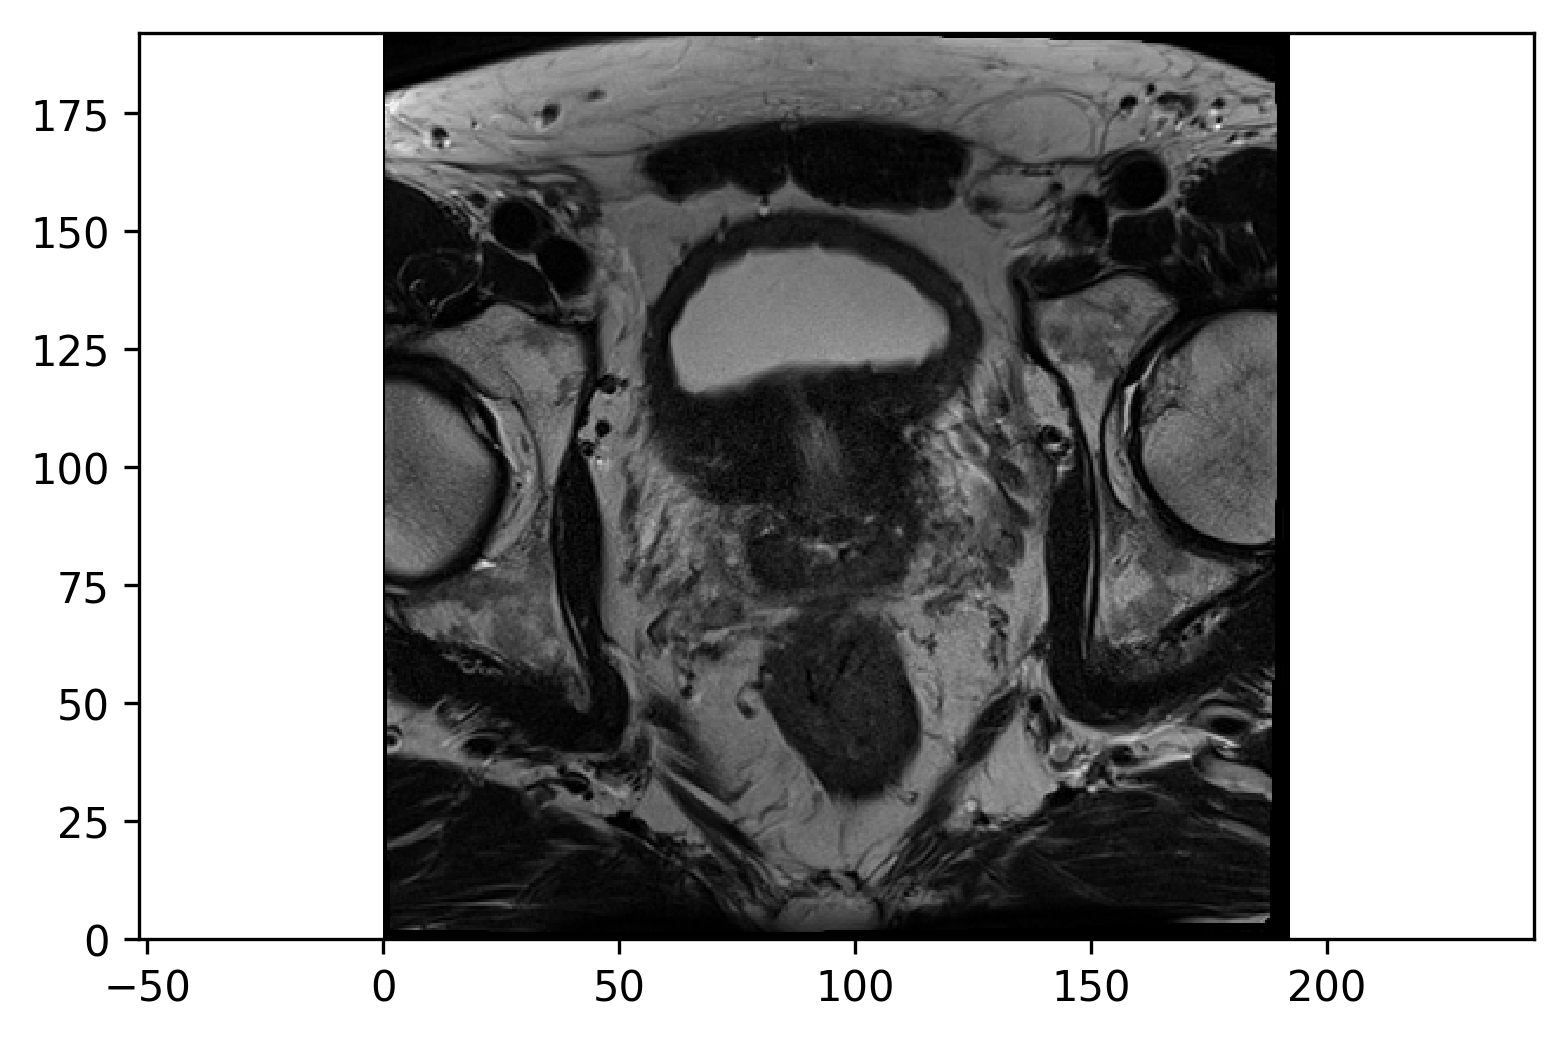

In [9]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 0]))

## DICOM SLICES EXPLORATION

In [23]:
folder_path = "/home/paulo/Projects/Thesis/prostatex/data/raw/Train_Images/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/6-ep2ddifftraDYNDIST-69284/"

In [24]:
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(folder_path):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))


In [25]:
lstFilesDCM

['/home/paulo/Projects/Thesis/prostatex/data/raw/Train_Images/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/6-ep2ddifftraDYNDIST-69284/000029.dcm',
 '/home/paulo/Projects/Thesis/prostatex/data/raw/Train_Images/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/6-ep2ddifftraDYNDIST-69284/000045.dcm',
 '/home/paulo/Projects/Thesis/prostatex/data/raw/Train_Images/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/6-ep2ddifftraDYNDIST-69284/000034.dcm',
 '/home/paulo/Projects/Thesis/prostatex/data/raw/Train_Images/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/6-ep2ddifftraDYNDIST-69284/000046.dcm',
 '/home/paulo/Projects/Thesis/prostatex/data/raw/Train_Images/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/6-ep2ddifftraDYNDIST-69284/000043.dcm',
 '/home/paulo/Projects/Thesis/prostatex/data/raw/Train_Images/ProstateX-0000/07-07-2011-MR prostaat kanke

In [26]:
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [27]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

ArrayDicomFiles = []

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  
    ArrayDicomFiles.append(ds)


Plotting using matplotline and the pixel array

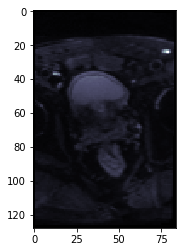

In [28]:
plt.imshow(ArrayDicom[:, :, 1], cmap=plt.cm.bone)

Plotting using the matplotlib and the DICOM images array

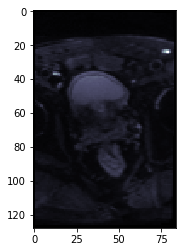

In [29]:
plt.imshow(ArrayDicomFiles[1].pixel_array, cmap=plt.cm.bone)

In [30]:
RefDs

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'DIFFUSION', 'TRACEW', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20110707'
(0008, 0013) Instance Creation Time              TM: '120403.531000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7311.5101.276978739847972077493654222099
(0008, 0020) Study Date                          DA: '20110707'
(0008, 0021) Series Date                         DA: '20110707'
(0008, 0022) Acquisition Date                    DA: '20110707'
(0008, 0023) Content Date                        DA: '20110707'
(0008, 0030) Study Time                          TM: '114731.187000'
(0008, 0031) Series Time                         TM: '120403.453000'
(0008, 0032) Acquisition Time                    TM: '120359.940000'
(0008, 0033) Content Time                 

In [32]:
ArrayDicomFiles[1].pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 5, 6, ..., 0, 0, 0],
       [0, 4, 4, ..., 4, 0, 0],
       ...,
       [0, 9, 8, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)